wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: kwangjunahn to https://microsoft-research.wandb.io. Use `wandb login --relogin` to force relogin


Run ID: mdhc8zqe, Name: dion_1 (0.01) --3072, State: crashed
Run ID: 862bugfy, Name: muon_1 (0.01) --3072, State: crashed
Run ID: 3cst5u3n, Name: dion_1 (0.01) --3072, State: crashed
Run ID: hqk6ommt, Name: ----------------------above-------------------, State: crashed
Run ID: coytfxkq, Name: (dion)_bs=4096_lr=0.01_sp=1.0, State: crashed
Run ID: uupu9z05, Name: (muon_moonlight+adam)_bs=4096_lr=0.01, State: crashed
Run ID: 4m1zksu0, Name: (dion)_bs=4096_lr=0.01_sp=0.25, State: failed
Run ID: 7oxqd8ql, Name: (dion)_bs=4096_lr=0.01_sp=1.0, State: crashed
Run ID: eg34kzpo, Name: (dion+lion)_bs=4096_lr=0.01_sp=1.0, State: crashed
Run ID: gweluhjs, Name: (adam+adam)_bs=4096_lr=0.001_sp=1.0, State: crashed


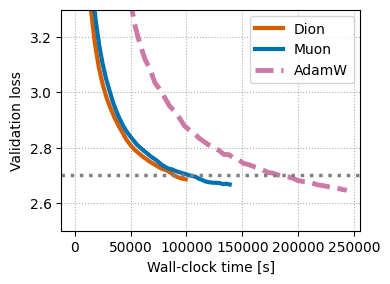

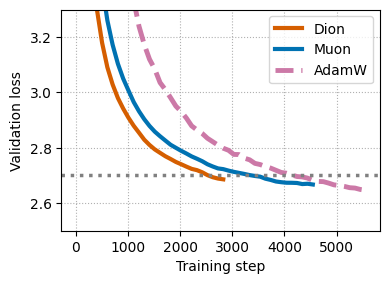

In [1]:
import wandb

# Log in to wandb (if not already logged in)
wandb.login()

# Initialize the API
api = wandb.Api()

# Fetch runs from the project "dion"
project_name = "scale-up"
entity_name = "kwangjunahn"  # Replace with your wandb entity/username
runs = api.runs(f"{entity_name}/{project_name}")
runs = [run for run in runs]

# Print run details
for run in runs:
    print(f"Run ID: {run.id}, Name: {run.name}, State: {run.state}")

import numpy as np
import matplotlib.pyplot as plt
import os

save_path = "dion/"
os.makedirs(save_path, exist_ok=True)

# 1️⃣  Grab the runs (assumes you already have `runs = api.runs("entity/project")`)
run_adamw = runs[-1]  # AdamW
run_dion = runs[-2]  # Dion
run_muon = runs[-5]  # Muon

import numpy as np
import matplotlib.pyplot as plt
import os

# ──────────────────────────────  USER-TUNABLE SETTINGS  ─────────────────────────────
target_loss = 2.7  # horizontal reference line
y_limits = (2.5, 3.3)  # set to None for auto-scaling, or (ymin, ymax) to fix
step_key = "_step"  # change if your runs log a different step counter
save_path = "dion/"
os.makedirs(save_path, exist_ok=True)
# ────────────────────────────────────────────────────────────────────────────────────


# Helper: pull a run’s history once and cache what we need
def fetch_series(run, step_key="_step"):
    """Return runtime (s), step, and val-loss arrays for a wandb run."""
    hist = run.history(keys=["_runtime", step_key, "val/loss"])
    runtime = np.asarray(hist["_runtime"], dtype=float)
    step = np.asarray(hist[step_key], dtype=float)
    vloss = np.asarray(hist["val/loss"], dtype=float)
    return runtime, step, vloss


# Fetch all series
rt_adamw, step_adamw, vloss_adamw = fetch_series(run_adamw, step_key)
rt_dion, step_dion, vloss_dion = fetch_series(run_dion, step_key)
rt_muon, step_muon, vloss_muon = fetch_series(run_muon, step_key)
# ─────────────────────────────  PLOT: time vs loss  ────────────────────────────────
plt.figure(figsize=(4, 3))
plt.plot(
    rt_dion, vloss_dion, label="Dion", linewidth=3.0, color="#D55E00"
)  # thicker, no markers
plt.plot(rt_muon, vloss_muon, label="Muon", linewidth=3.0, color="#0072B2")
plt.plot(
    rt_adamw, vloss_adamw, label="AdamW", linestyle="--", linewidth=3.5, color="#CC79A7"
)

plt.axhline(
    y=target_loss, linestyle=":", color="gray", linewidth=2.5
)  # thicker ref line
# plt.text(rt_adamw.max()*0.02, target_loss+0.01, f"target loss = {target_loss}", va='bottom', ha='left')

plt.xlabel("Wall-clock time [s]")
plt.ylabel("Validation loss")
if y_limits:
    plt.ylim(*y_limits)
plt.grid(True, linestyle=":")
plt.legend(loc="upper right")
plt.tight_layout()

fname_time = os.path.join(save_path, "val_vs_time.png")
plt.savefig(fname_time, bbox_inches="tight")
plt.show()

# ─────────────────────────────  PLOT: step vs loss  ────────────────────────────────
plt.figure(figsize=(4, 3))
plt.plot(step_dion, vloss_dion, label="Dion", linewidth=3.0, color="#D55E00")
plt.plot(step_muon, vloss_muon, label="Muon", linewidth=3.0, color="#0072B2")
plt.plot(
    step_adamw,
    vloss_adamw,
    label="AdamW",
    linestyle="--",
    linewidth=3.5,
    color="#CC79A7",
)

plt.axhline(y=target_loss, linestyle=":", color="gray", linewidth=2.5)
# plt.text(step_adamw.max()*0.02, target_loss+0.01, f"target loss = {target_loss}", va='bottom', ha='left')

plt.xlabel("Training step")
plt.ylabel("Validation loss")
if y_limits:
    plt.ylim(*y_limits)
plt.grid(True, linestyle=":")
plt.legend(loc="upper right")
plt.tight_layout()

fname_step = os.path.join(save_path, "val_vs_step.png")
plt.savefig(fname_step, bbox_inches="tight")
plt.show()

Speedup factors:
 - Dion: 2.0x
 - Muon: 1.8x


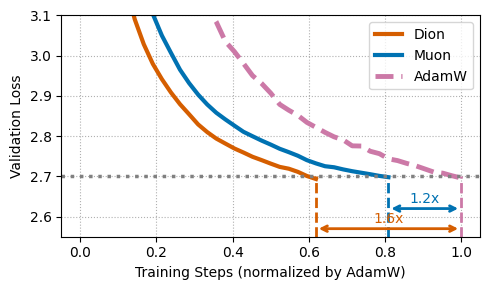

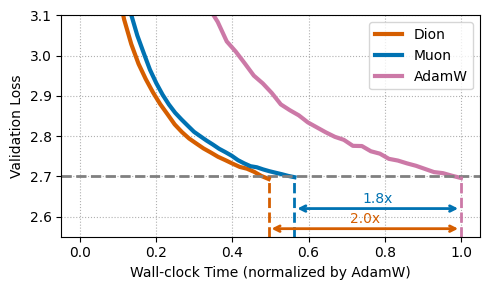

Saved with arrows:
 - dion/val_vs_step_scaled_arrows.png
 - dion/val_vs_time_scaled_arrows.png


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os

# ──────────────── USER SETTINGS ────────────────
target_loss = 2.7
y_limits = (2.55, 3.1)
step_key = "_step"
save_path = "dion/"
os.makedirs(save_path, exist_ok=True)
# ───────────────────────────────────────────────


# Helper: load run history
def fetch_series(run):
    hist = run.history(keys=["_runtime", step_key, "val/loss"])
    return (
        np.asarray(hist["_runtime"], dtype=float),
        np.asarray(hist[step_key], dtype=float),
        np.asarray(hist["val/loss"], dtype=float),
    )


# Find first crossing index
def crossing_index(vloss, target):
    idx = np.where(vloss <= target)[0]
    return idx[0] if len(idx) > 0 else -1


# Load all runs
rt_adamw, step_adamw, vloss_adamw = fetch_series(run_adamw)
rt_dion, step_dion, vloss_dion = fetch_series(run_dion)
rt_muon, step_muon, vloss_muon = fetch_series(run_muon)

# Find crossing indices
idx_aw = crossing_index(vloss_adamw, target_loss)
idx_dion = crossing_index(vloss_dion, target_loss)
idx_muon = crossing_index(vloss_muon, target_loss)

# Define normalizers (AdamW crossing)
t_norm = rt_adamw[idx_aw]
s_norm = step_adamw[idx_aw]

# Scale & cut all series at their crossings
rt_aw_plot = rt_adamw[: idx_aw + 1] / t_norm
rt_dion_plot = rt_dion[: idx_dion + 1] / t_norm
rt_muon_plot = rt_muon[: idx_muon + 1] / t_norm

step_aw_plot = step_adamw[: idx_aw + 1] / s_norm
step_dion_plot = step_dion[: idx_dion + 1] / s_norm
step_muon_plot = step_muon[: idx_muon + 1] / s_norm

vloss_aw_plot = vloss_adamw[: idx_aw + 1]
vloss_dion_plot = vloss_dion[: idx_dion + 1]
vloss_muon_plot = vloss_muon[: idx_muon + 1]

# Compute speedup factors
speedup_dion_time = t_norm / rt_dion[idx_dion]
speedup_muon_time = t_norm / rt_muon[idx_muon]
print(
    f"Speedup factors:\n - Dion: {speedup_dion_time:.1f}x\n - Muon: {speedup_muon_time:.1f}x"
)

speedup_dion_step = s_norm / step_dion[idx_dion]
speedup_muon_step = s_norm / step_muon[idx_muon]

# ──────────────── PLOT: STEP ────────────────
plt.figure(figsize=(5, 3))
plt.plot(step_dion_plot, vloss_dion_plot, label="Dion", linewidth=3.0, color="#D55E00")
plt.plot(step_muon_plot, vloss_muon_plot, label="Muon", linewidth=3.0, color="#0072B2")
plt.plot(
    step_aw_plot,
    vloss_aw_plot,
    label="AdamW",
    linestyle="--",
    linewidth=3.5,
    color="#CC79A7",
)

# horizontal target line
plt.axhline(target_loss, linestyle=":", color="gray", linewidth=2.5)

# vertical lines at crossings
for x_scaled, color in zip(
    [step_dion_plot[-1], step_muon_plot[-1], 1.0], ["#D55E00", "#0072B2", "#CC79A7"]
):
    plt.axvline(
        x=x_scaled,
        ymax=(target_loss - y_limits[0]) / (y_limits[1] - y_limits[0]),
        linestyle="--",
        color=color,
        linewidth=2.0,
    )

# arrows + labels
y_arrow = y_limits[0] + 0.02  # place arrows near bottom
# Dion
plt.annotate(
    "",
    xy=(1.0, y_arrow),
    xytext=(step_dion_plot[-1], y_arrow),
    arrowprops=dict(arrowstyle="<->", color="#D55E00", linewidth=2),
)
plt.text(
    0.5 * (1.0 + step_dion_plot[-1]),
    y_arrow + 0.015,
    f"{speedup_dion_step:.1f}x",
    ha="center",
    color="#D55E00",
    fontsize=10,
)
# Muon
plt.annotate(
    "",
    xy=(1.0, y_arrow + 0.05),
    xytext=(step_muon_plot[-1], y_arrow + 0.05),
    arrowprops=dict(arrowstyle="<->", color="#0072B2", linewidth=2),
)
plt.text(
    0.5 * (1.0 + step_muon_plot[-1]),
    y_arrow + 0.065,
    f"{speedup_muon_step:.1f}x",
    ha="center",
    color="#0072B2",
    fontsize=10,
)

plt.xlabel("Training Steps (normalized by AdamW)")
plt.ylabel("Validation Loss")
plt.ylim(y_limits)
plt.grid(True, linestyle=":")
plt.legend(loc="upper right")
plt.tight_layout()

fname_step = os.path.join(save_path, "val_vs_step_scaled_arrows.png")
plt.savefig(fname_step, format="png", bbox_inches="tight")
plt.show()

# ──────────────── PLOT: TIME ────────────────
plt.figure(figsize=(5, 3))
plt.plot(rt_dion_plot, vloss_dion_plot, label="Dion", linewidth=3.0, color="#D55E00")
plt.plot(rt_muon_plot, vloss_muon_plot, label="Muon", linewidth=3.0, color="#0072B2")
plt.plot(rt_aw_plot, vloss_aw_plot, label="AdamW", linewidth=3.0, color="#CC79A7")

# horizontal target line
plt.axhline(target_loss, linestyle="--", color="gray", linewidth=2)

# vertical lines at crossings
for x_scaled, color in zip(
    [rt_dion_plot[-1], rt_muon_plot[-1], 1.0], ["#D55E00", "#0072B2", "#CC79A7"]
):
    plt.axvline(
        x=x_scaled,
        ymax=(target_loss - y_limits[0]) / (y_limits[1] - y_limits[0]),
        linestyle="--",
        color=color,
        linewidth=2.0,
    )

# arrows + labels
y_arrow = y_limits[0] + 0.02
# Dion
plt.annotate(
    "",
    xy=(1.0, y_arrow),
    xytext=(rt_dion_plot[-1], y_arrow),
    arrowprops=dict(arrowstyle="<->", color="#D55E00", linewidth=2),
)
plt.text(
    0.5 * (1.0 + rt_dion_plot[-1]),
    y_arrow + 0.015,
    f"{speedup_dion_time:.1f}x",
    ha="center",
    color="#D55E00",
    fontsize=10,
)
# Muon
plt.annotate(
    "",
    xy=(1.0, y_arrow + 0.05),
    xytext=(rt_muon_plot[-1], y_arrow + 0.05),
    arrowprops=dict(arrowstyle="<->", color="#0072B2", linewidth=2),
)
plt.text(
    0.5 * (1.0 + rt_muon_plot[-1]),
    y_arrow + 0.065,
    f"{speedup_muon_time:.1f}x",
    ha="center",
    color="#0072B2",
    fontsize=10,
)

plt.xlabel("Wall-clock Time (normalized by AdamW)")
plt.ylabel("Validation Loss")
plt.ylim(y_limits)
plt.grid(True, linestyle=":")
plt.legend(loc="upper right")
plt.tight_layout()

fname_time = os.path.join(save_path, "val_vs_time_scaled_arrows.pdf")
plt.savefig(fname_time, format="pdf", bbox_inches="tight")
plt.show()

print(f"Saved with arrows:\n - {fname_step}\n - {fname_time}")